<h1>Blindness Detection</h1>

<h3>Final function</h3>

This image is 65.7% Moderate


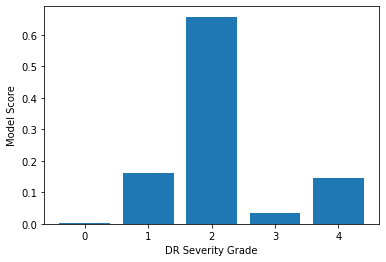

Prediction time: 14.489 seconds
Prediction rate: 0.241 per minute


In [1]:
import time
start = time.time()

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

AUTOTUNE = tf.data.experimental.AUTOTUNE
LABELS = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]
BATCH_SIZE = 8
IMAGE_SIZE = [320, 320]

model = tf.keras.models.load_model("model.h5")

def final_func_1(image_path):

    def decode_img(image):
        image = tf.image.decode_png(image, channels=3)
        image = tf.image.convert_image_dtype(image, tf.float32)
        return tf.image.resize(image, IMAGE_SIZE)

    def preprocess(image):
        image = tf.io.read_file(image)
        image = decode_img(image)
        return image
    
    image = list(tf.data.Dataset.list_files(image_path))

    ds = tf.data.Dataset.from_tensor_slices(image)
    ds = ds.map(preprocess, num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE)

    prediction = model.predict(ds)
    
    number = str(round(100 * prediction[0][np.argmax(prediction[0])], 2))
    predicted_label = f"This image is {number}% {LABELS[np.argmax(prediction)]}"
    
    print(predicted_label)
    
    plt.subplot(1, 1, 1)
    plt.bar(np.arange(len(prediction[0])), prediction[0])
    plt.xlabel("DR Severity Grade")
    plt.ylabel("Model Score")
    plt.show()
    
final_func_1("train_images/61bbc11fe503.png")

print('Prediction time: {:.3f} seconds'.format(time.time() - start))
print('Prediction rate: {:.3f} per minute'.format((time.time() - start)/60))

This image is 96.94% Moderate


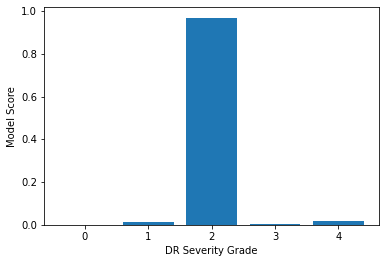

Prediction rate - 0.009 per minute


In [2]:
start = time.time()

final_func_1("train_images/a3b2e93d058b.png")

print('Prediction rate - {:.3f} per minute'.format((time.time() - start)/60))

This image is 99.74% No DR


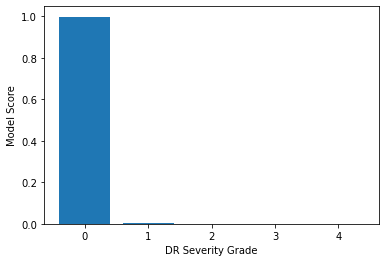

Prediction rate - 0.008 per minute


In [3]:
start = time.time()

final_func_1("train_images/60edda7b4871.png")

print('Prediction rate - {:.3f} per minute'.format((time.time() - start)/60))

<h3>Conclusion</h3>

For the first time, prediction time (14s) is hihger because we are loading model and then predicting. But after first prediction it will be very less (0.45 s).